# Python Programming Language for Data Analysis with Pandas Library


**In this workshop we will analyze the data set with information on return and Morningstar Sustainalytics rating of 2000+ ETF from 2015 to 2021 using the `pandas` library.** 

Python programming language has numerous functions. These functions are organized into modules. Modules are python scripts that contain Python objects. In order to use the objects inside these modules (or commonly known as libraries), we must first import either the entire module or specific objects in it. 

**`pandas` (Python for Data Analysis)** is a popular python library for data analysis. We will use this library extensively in this workshop. This library is automatically installed during Anaconda installation. It is also installed and available on Google Colab or UofT Jupyter Hub. 

Other popular python libraries are **`NumPy` (Numerical Python)** and **`matplotlib`** used for scientific computing and visualization, respectively. We will use these libraries too. 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# read select columns only
col_list=['Name', 'Ticker', 'Base Currency', 'Global Broad Category Group',
          'Fund Size Base Currency', 'Domicile', 'month',
          'Monthly Return  Base Currency', 'Total Market Value(Net)  Portfolio Currency', 
          'asset_class', 'Morningstar Rating Overall', 'Carbon Risk Classification',
          'Portfolio Environmental Risk Score', 'Portfolio Governance Risk Score',
          'Portfolio Social Risk Score', 'Currency Code', 'Exchange Rate USD']
etf = pd.read_csv('ETF_Data_final.csv', sep=",", header=0, index_col=None, usecols=col_list)

In [3]:
# change column names
etf.columns = ['Name', 'Ticker', 'Base_Currency', 'Global_Broad_Category_Group',
          'Fund_Size_Base_Currency', 'Domicile', 'Month',
          'Monthly_Return_Base_Currency', 'Total_Market_Value_Portfolio_Currency', 
          'Asset_Class', 'Morningstar_Rating_Overall', 'Carbon_Risk_Classification',
          'Portfolio_Environmental_Risk_Score', 'Portfolio_Governance_Risk_Score',
          'Portfolio_Social_Risk_Score', 'Currency_Code', 'Exchange_Rate_USD']
etf.head()

,Name,Ticker,Base_Currency,Global_Broad_Category_Group,Fund_Size_Base_Currency,Domicile,Month,Monthly_Return_Base_Currency,Total_Market_Value_Portfolio_Currency,Asset_Class,Morningstar_Rating_Overall,Carbon_Risk_Classification,Portfolio_Environmental_Risk_Score,Portfolio_Governance_Risk_Score,Portfolio_Social_Risk_Score,Currency_Code,Exchange_Rate_USD
0,AAF First Priority CLO Bond ETF,AAA,US Dollar,Fixed Income,10002701.0,United States,2020-10-01,0.00281,9563230.0,bond,NaN,NaN,NaN,NaN,NaN,USD,1.0
1,AAF First Priority CLO Bond ETF,AAA,US Dollar,Fixed Income,10002701.0,United States,2020-11-01,0.61405,9615667.0,bond,NaN,NaN,NaN,NaN,NaN,USD,1.0
2,AAF First Priority CLO Bond ETF,AAA,US Dollar,Fixed Income,10002701.0,United States,2020-12-01,0.27885,9633997.0,bond,NaN,NaN,NaN,NaN,NaN,USD,1.0
3,AAF First Priority CLO Bond ETF,AAA,US Dollar,Fixed Income,10002701.0,United States,2021-01-01,0.43888,9173441.0,bond,NaN,NaN,NaN,NaN,NaN,USD,1.0
4,AAF First Priority CLO Bond ETF,AAA,US Dollar,Fixed Income,10002701.0,United States,2021-02-01,-0.13515,9609404.0,bond,NaN,NaN,NaN,NaN,NaN,USD,1.0


In [4]:
etf['date'] = pd.to_datetime(etf['Month'],format='%Y-%m-%d', errors='coerce')
etf['month'] = etf['date'].dt.month
etf['year'] = etf['date'].dt.year

etf['monthly_return_USD'] = etf['Monthly_Return_Base_Currency']*etf['Exchange_Rate_USD']
etf['total_market_value_USD'] = etf['Total_Market_Value_Portfolio_Currency']*etf['Exchange_Rate_USD']

etf['total_mkt_val_net_USD_millions'] = etf['total_market_value_USD']/1000000
etf['primary_key'] = etf['Ticker'] + etf['Currency_Code']

In [5]:
etf.dropna(subset=['Monthly_Return_Base_Currency','Total_Market_Value_Portfolio_Currency'], inplace=True)
etf.shape

(133999, 24)

## 3. Time Series

In this section we will learn to do manipulate time series data using the pandas library:

1. Resample time series data to some offset period and get aggregate values for each time period
2. Shift time series data to one or more periods in past or in the future.
3. Calculate rollowing window statistics of time series data



### 3a. Resample

While `Groupby` works really well for summarizing categorical data, `resample` provides additional functionalities specific to timeseries data. For instance, we can aggregate the monthly data to provide a yearly average value. 
To use the `resample` method, we must set the index of our data to `DateTimeIndex`. 

In [6]:
etf_ts = etf[['Asset_Class','date','total_mkt_val_net_USD_millions', 'monthly_return_USD']]
etf_ts.set_index('date', inplace=True)
etf_ts.head()

,Asset_Class,total_mkt_val_net_USD_millions,monthly_return_USD
date,,,
2020-10-01,bond,9.563230,0.00281
2020-11-01,bond,9.615667,0.61405
2020-12-01,bond,9.633997,0.27885
2021-01-01,bond,9.173441,0.43888
2021-02-01,bond,9.609404,-0.13515


In [7]:
etf_ts.resample('M').agg(['mean', 'std'])

total_mkt_val_net_USD_millions               monthly_return_USD  \
                                     mean           std               mean   
date                                                                         
2015-01-31                    3183.828737  18430.417679          -1.324719   
2015-02-28                    3765.767623  21642.797466           5.297737   
2015-03-31                    3418.093006  20675.761848          -0.336378   
2015-04-30                    3450.132882  20906.108008           2.154138   
2015-05-31                    3415.776357  20800.420558           0.644208   
...                                   ...           ...                ...   
2021-08-31                    5992.296533  55590.707406           1.410368   
2021-09-30                    5710.723837  52567.640147          -2.863740   
2021-10-31                    5914.073078  55071.988895           3.398833   
2021-11-30                    5841.729003  54312.915781          -2.423163   
2021-12-31                    5901.509061  56537.549026           2.340254   

                       
                  std  
date                   
2015-01-31   6.849391  
2015-02-28   9.277657  
2015-03-31  10.137502  
2015-04-30   8.376473  
2015-05-31  10.366596  
...               ...  
2021-08-31   4.975738  
2021-09-30   6.088118  
2021-10-31   8.019355  
2021-11-30   5.526236  
2021-12-31   8.419392  

[84 rows x 4 columns]

In [8]:
etf_ts.resample('Y').agg(['mean', 'std'])

total_mkt_val_net_USD_millions               monthly_return_USD  \
                                     mean           std               mean   
date                                                                         
2015-12-31                    3273.534067  20024.001693          -0.198631   
2016-12-31                    3181.601451  21180.396516           2.565560   
2017-12-31                    3941.499596  27262.977556           2.153642   
2018-12-31                    4186.198101  30848.868047          -0.703956   
2019-12-31                    4865.181904  41651.869811           1.592886   
2020-12-31                    5159.647084  46542.906461           1.846652   
2021-12-31                    5821.639099  53590.282318           1.260085   

                        
                   std  
date                    
2015-12-31    9.794917  
2016-12-31  129.306492  
2017-12-31   47.985924  
2018-12-31   18.651800  
2019-12-31    8.835964  
2020-12-31   23.737086  
2021-12-31   15.790632

Here, `Y` and `M` specifies that we want to aggregate by year and month, respectively.

`groupby` and `resample` can be combined together to get time series summary of each group separately. 

In [9]:
etf_ts.groupby('Asset_Class').resample(rule='Q').mean()

total_mkt_val_net_USD_millions  monthly_return_USD
Asset_Class date                                                          
bond        2019-03-31                     6047.313484            1.554015
            2019-06-30                     6318.816816            0.885401
            2019-09-30                     8734.952396            0.719377
            2019-12-31                     9845.769929            0.449509
            2020-03-31                     9503.206176           -1.867094
...                                                ...                 ...
real_estate 2020-12-31                     1728.743832            3.878103
            2021-03-31                     1904.339351            5.288274
            2021-06-30                     2204.238618            3.179804
            2021-09-30                     2356.648146           -0.449579
            2021-12-31                     2451.812553            2.027683

[96 rows x 2 columns]

In [10]:
etf_ts.groupby('Asset_Class').resample(rule='W').mean()

total_mkt_val_net_USD_millions  monthly_return_USD
Asset_Class date                                                          
bond        2019-01-06                     5728.121037            2.286208
            2019-01-13                             NaN                 NaN
            2019-01-20                             NaN                 NaN
            2019-01-27                             NaN                 NaN
            2019-02-03                     6221.745420            1.292262
...                                                ...                 ...
real_estate 2021-11-07                     2413.999719           -2.377704
            2021-11-14                             NaN                 NaN
            2021-11-21                             NaN                 NaN
            2021-11-28                             NaN                 NaN
            2021-12-05                     2456.568169            3.415575

[1239 rows x 2 columns]

If you use `resample` with an offset period that requires interpolation, then the `NaN` values can be either filled with the previous or the next value in the time series using `bfill` and `ffill` respectively. 

In [11]:
etf_ts.groupby('Asset_Class').resample(rule='W').mean().bfill()

total_mkt_val_net_USD_millions  monthly_return_USD
Asset_Class date                                                          
bond        2019-01-06                     5728.121037            2.286208
            2019-01-13                     6221.745420            1.292262
            2019-01-20                     6221.745420            1.292262
            2019-01-27                     6221.745420            1.292262
            2019-02-03                     6221.745420            1.292262
...                                                ...                 ...
real_estate 2021-11-07                     2413.999719           -2.377704
            2021-11-14                     2456.568169            3.415575
            2021-11-21                     2456.568169            3.415575
            2021-11-28                     2456.568169            3.415575
            2021-12-05                     2456.568169            3.415575

[1239 rows x 2 columns]

In [12]:
etf_ts.groupby('Asset_Class').resample(rule='W').mean().ffill().add_suffix('_ffill')

total_mkt_val_net_USD_millions_ffill  \
Asset_Class date                                               
bond        2019-01-06                           5728.121037   
            2019-01-13                           5728.121037   
            2019-01-20                           5728.121037   
            2019-01-27                           5728.121037   
            2019-02-03                           6221.745420   
...                                                      ...   
real_estate 2021-11-07                           2413.999719   
            2021-11-14                           2413.999719   
            2021-11-21                           2413.999719   
            2021-11-28                           2413.999719   
            2021-12-05                           2456.568169   

                        monthly_return_USD_ffill  
Asset_Class date                                  
bond        2019-01-06                  2.286208  
            2019-01-13                  2.286208  
            2019-01-20                  2.286208  
            2019-01-27                  2.286208  
            2019-02-03                  1.292262  
...                                          ...  
real_estate 2021-11-07                 -2.377704  
            2021-11-14                 -2.377704  
            2021-11-21                 -2.377704  
            2021-11-28                 -2.377704  
            2021-12-05                  3.415575  

[1239 rows x 2 columns]

### 3b. Shift 

The `shift` method allows us to shift the data to one or more period in the future.

In [13]:
cols_of_interest = ['Ticker','date','Asset_Class','total_mkt_val_net_USD_millions', 'monthly_return_USD']
VTIUSD_ts = etf.loc[etf['primary_key']=='VTIUSD', cols_of_interest]
VTIUSD_ts.set_index('date',inplace=True)
VTIUSD_ts.head()

,Ticker,Asset_Class,total_mkt_val_net_USD_millions,monthly_return_USD
date,,,,
2015-01-01,VTI,equity,380000.0,-2.77358
2015-02-01,VTI,equity,405000.0,5.77334
2015-03-01,VTI,equity,404000.0,-1.00821
2015-04-01,VTI,equity,406000.0,0.42831
2015-05-01,VTI,equity,410000.0,1.39069


In [14]:
VTIUSD_ts.shift(periods=1)

,Ticker,Asset_Class,total_mkt_val_net_USD_millions,monthly_return_USD
date,,,,
2015-01-01,NaN,NaN,NaN,NaN
2015-02-01,VTI,equity,380000.0,-2.77358
2015-03-01,VTI,equity,405000.0,5.77334
2015-04-01,VTI,equity,404000.0,-1.00821
2015-05-01,VTI,equity,406000.0,0.42831
...,...,...,...,...
2021-08-01,VTI,equity,1270000.0,1.70952
2021-09-01,VTI,equity,1310000.0,2.87189
2021-10-01,VTI,equity,1250000.0,-4.48534


Specifying a negative value in the `periods` parameter of `shift` method allows us to shift the data to past i.e. create a lag of the time value. 

In [15]:
VTIUSD_ts.shift(periods=-1)

,Ticker,Asset_Class,total_mkt_val_net_USD_millions,monthly_return_USD
date,,,,
2015-01-01,VTI,equity,405000.0,5.77334
2015-02-01,VTI,equity,404000.0,-1.00821
2015-03-01,VTI,equity,406000.0,0.42831
2015-04-01,VTI,equity,410000.0,1.39069
2015-05-01,VTI,equity,403000.0,-1.70118
...,...,...,...,...
2021-08-01,VTI,equity,1250000.0,-4.48534
2021-09-01,VTI,equity,1350000.0,6.71981
2021-10-01,VTI,equity,1330000.0,-1.48133


In [16]:
VTIUSD_ts['shifted_mktval'] = VTIUSD_ts['total_mkt_val_net_USD_millions'].shift(periods=1)
VTIUSD_ts['change_mktval'] = VTIUSD_ts['total_mkt_val_net_USD_millions']/VTIUSD_ts['shifted_mktval']
VTIUSD_ts.head()

,Ticker,Asset_Class,total_mkt_val_net_USD_millions,monthly_return_USD,shifted_mktval,change_mktval
date,,,,,,
2015-01-01,VTI,equity,380000.0,-2.77358,NaN,NaN
2015-02-01,VTI,equity,405000.0,5.77334,380000.0,1.065789
2015-03-01,VTI,equity,404000.0,-1.00821,405000.0,0.997531
2015-04-01,VTI,equity,406000.0,0.42831,404000.0,1.004950
2015-05-01,VTI,equity,410000.0,1.39069,406000.0,1.009852


### 3c. Rolling Statistics


When working with time series rolling-window analysis is often of interest. It involves calculating some statistic for a speficied number of adjacent time interval, which is the window. Pandas provied the `rolling` method for this. 

In [18]:
VTIUSD_rollavg_ts = VTIUSD_ts.rolling(window=3).mean()
VTIUSD_rollavg_ts

,total_mkt_val_net_USD_millions,monthly_return_USD,shifted_mktval,change_mktval
date,,,,
2015-01-01,NaN,NaN,NaN,NaN
2015-02-01,NaN,NaN,NaN,NaN
2015-03-01,3.963333e+05,0.663850,NaN,NaN
2015-04-01,4.050000e+05,1.731147,3.963333e+05,1.022757
2015-05-01,4.066667e+05,0.270263,4.050000e+05,1.004111
...,...,...,...,...
2021-08-01,1.276667e+06,2.377193,1.246667e+06,1.024029
2021-09-01,1.276667e+06,0.032023,1.276667e+06,1.000565
2021-10-01,1.303333e+06,1.702120,1.276667e+06,1.021898


Combining the iterative power of `groupby` with `rolling` method can provide us with rolling statistics for each group.

In [19]:
asset_grouped_rolling_stat = []
for i,j in etf_ts.groupby('Asset_Class')['monthly_return_USD']:
    print(i)
    asset_grouped_rolling_stat.append(j.resample('M').mean().rolling(4).mean())
asset_grouped_rolling_stat[0]

bond
commodity
equity
real_estate


date
2019-01-31         NaN
2019-02-28         NaN
2019-03-31         NaN
2019-04-30    1.377916
2019-05-31    0.901677
2019-06-30    0.946168
2019-07-31    0.849611
2019-08-31    0.965082
2019-09-30    0.907135
2019-10-31    0.573879
2019-11-30    0.400174
2019-12-31    0.373054
2020-01-31    0.704979
2020-02-29    0.537340
2020-03-31   -1.083670
2020-04-30   -0.093364
2020-05-31    0.153724
2020-06-30    2.152636
2020-07-31    4.245856
2020-08-31    3.113248
2020-09-30    2.453982
2020-10-31    0.480344
2020-11-30    0.713282
2020-12-31    1.648145
2021-01-31    3.007691
2021-02-28    3.333025
2021-03-31    2.582951
2021-04-30    1.943867
2021-05-31    0.722866
2021-06-30    0.710754
2021-07-31    0.892714
2021-08-31    0.557501
2021-09-30    0.261947
2021-10-31    0.257473
2021-11-30    0.045962
2021-12-31    0.049682
Freq: M, Name: monthly_return_USD, dtype: float64

In [20]:
asset_grouped_rolling_stat[-1]

date
2015-01-31         NaN
2015-02-28         NaN
2015-03-31         NaN
2015-04-30    0.406920
2015-05-31   -0.855643
                ...   
2021-08-31    1.897829
2021-09-30    0.229511
2021-10-31    0.938252
2021-11-30    0.085800
2021-12-31    0.514813
Freq: M, Name: monthly_return_USD, Length: 84, dtype: float64

## 4. Visualization
### 4a. Quick Visualization of Pandas DataFrame or Series

The simplest way of plotting a numeric column in pandas is to take the column of interest and specify the `kind` parameter to the type of plot we want. We should add a line `plt.show()` to display the plot. For example, histogram can be created by providing `hist` argument to the `kind` parameter.

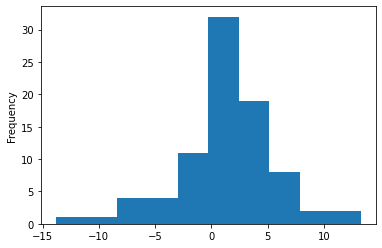

In [21]:
etf.loc[etf['primary_key']=='VTIUSD','monthly_return_USD'].plot(kind='hist')
plt.show()

We can also use `plot.hist` method to create a histogram. Additional parameters such as `bins` and `alpha` are also provided to control the number of bins in the histogram and the intensity of color, respectively. 

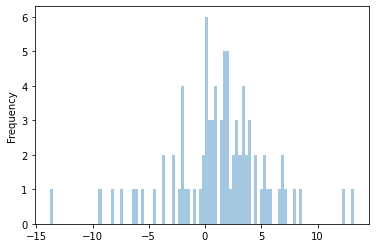

In [22]:
etf.loc[etf['primary_key']=='VTIUSD','monthly_return_USD'].plot.hist(bins=100, alpha=0.4)
plt.show()

In [23]:
etf.loc[etf['primary_key']=='VTIUSD','monthly_return_USD'].agg(['max','mean','min'])

max     13.258340
mean     1.229949
min    -13.797190
Name: monthly_return_USD, dtype: float64

Plots can also be created out of `groupby` objects. For example we can create barplot of each operation on a group and display them together.

In [24]:
etf_ts.head()

,Asset_Class,total_mkt_val_net_USD_millions,monthly_return_USD
date,,,
2020-10-01,bond,9.563230,0.00281
2020-11-01,bond,9.615667,0.61405
2020-12-01,bond,9.633997,0.27885
2021-01-01,bond,9.173441,0.43888
2021-02-01,bond,9.609404,-0.13515


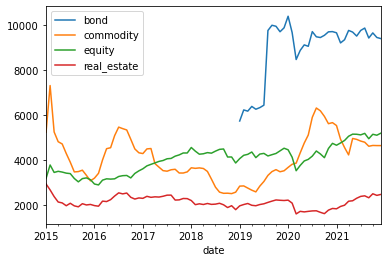

In [25]:
for i,j in etf_ts.groupby('Asset_Class')['total_mkt_val_net_USD_millions']:
    j.resample('M').mean().plot(label=i)
    plt.legend()

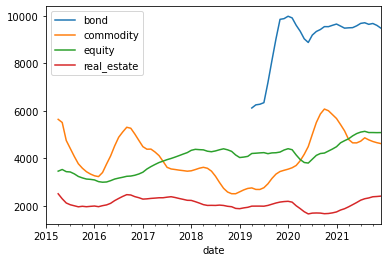

In [26]:
for i,j in etf_ts.groupby('Asset_Class')['total_mkt_val_net_USD_millions']:
    j.resample('M').mean().rolling(4).mean().plot(label=i)
    plt.legend()

Having `DateTime` data type makes plotting time series rather accurate. 

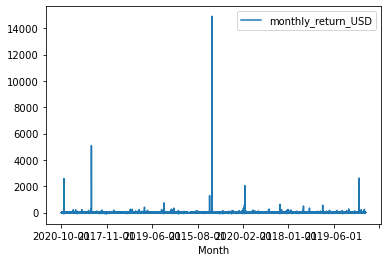

In [27]:
etf.plot(x='Month',y='monthly_return_USD')
plt.show()

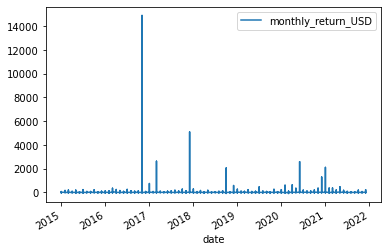

In [28]:
etf.plot(x='date',y='monthly_return_USD')
plt.show()

To plot data that represent multiple categories, `pivot` function can be used to create columns and rows of categories and then plot the values in it.

In [29]:
ticker_time_grouped = etf.groupby(['year','primary_key'], 
                                  as_index=False)['total_mkt_val_net_USD_millions'].mean()
idx = ticker_time_grouped['total_mkt_val_net_USD_millions'].nlargest(25).index
largest_portfolio = ticker_time_grouped.loc[idx]
largest_portfolio

,year,primary_key,total_mkt_val_net_USD_millions
10762,2021,MUSTGBPUSD,1.421359e+06
6182,2019,MUSTGBPUSD,1.265621e+06
11648,2021,VTIUSD,1.237500e+06
8340,2020,MUSTGBPUSD,1.223333e+06
11646,2021,VTICADUSD,9.699817e+05
9108,2020,VTIUSD,9.065833e+05
6879,2019,VTIUSD,8.129167e+05
11619,2021,VOOUSD,7.508333e+05
4913,2018,VTIUSD,7.085000e+05
9106,2020,VTICADUSD,6.664597e+05


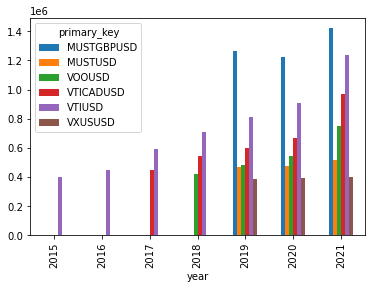

In [30]:
largest_portfolio.pivot('year','primary_key','total_mkt_val_net_USD_millions').plot(kind='bar')
plt.show()

Since results of `pivot_table`, `resample` and `rolling` are also provides in form of `DataFrame`, all plot functionalities can be applied to them as well. 

In [31]:
return_overtime = pd.pivot_table(data=etf, 
                                 index=['month'], 
                                 columns=['year'],
                                 values=['monthly_return_USD'],
                                 aggfunc=np.mean)
return_overtime.head()

monthly_return_USD                                                     \
year                2015      2016      2017      2018      2019       2020   
month                                                                         
1              -1.324719 -5.499426  3.500937  4.522638  7.520822  -0.522051   
2               5.297737  1.099189  2.276224 -3.743199  2.499822  -5.824115   
3              -0.336378  8.321208  2.694356 -1.092161  0.535222 -15.097400   
4               2.154138  3.522659  1.250519  0.782593  2.123599  11.852754   
5               0.644208  0.581695  0.767169  1.085952 -4.204840   4.813936   

                 
year       2021  
month            
1      2.975626  
2      3.989272  
3      1.823757  
4      2.965256  
5      1.503999

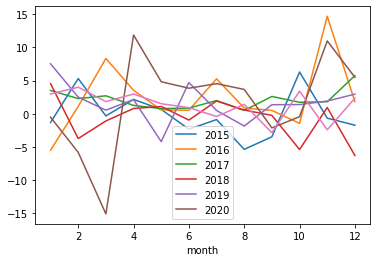

In [32]:
return_overtime.plot()
plt.legend([str(i) for i in range(2015,2021)])
plt.show()

Standard deviation information can be used to create error bars in a time series plot. 

In [33]:
monthlyreturn_ts = etf_ts.drop('total_mkt_val_net_USD_millions', axis=1).resample('M').agg(['mean', 'std'])
monthlyreturn_ts.head()

monthly_return_USD           
                         mean        std
date                                    
2015-01-31          -1.324719   6.849391
2015-02-28           5.297737   9.277657
2015-03-31          -0.336378  10.137502
2015-04-30           2.154138   8.376473
2015-05-31           0.644208  10.366596

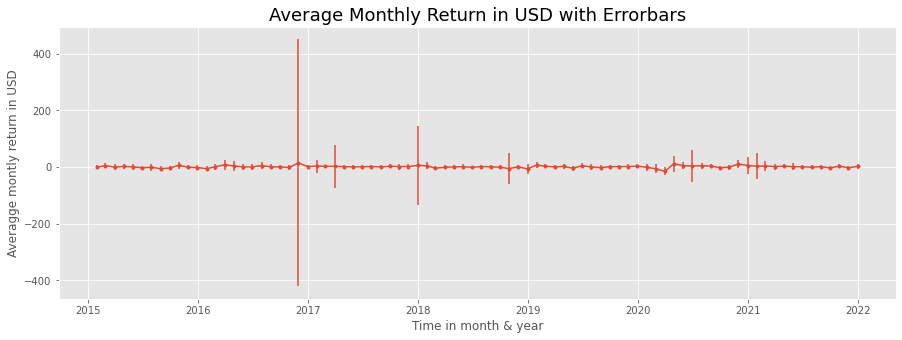

In [34]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,5))
ax.errorbar(monthlyreturn_ts.index, 
            monthlyreturn_ts[('monthly_return_USD', 'mean')],
            yerr=monthlyreturn_ts[('monthly_return_USD', 'std')],
            marker ='.'
           )
plt.xlabel('Time in month & year')
plt.ylabel('Averagge montly return in USD')
plt.title('Average Monthly Return in USD with Errorbars', fontsize=18)
plt.show()

`fig.savefig` method can be used to save plots. We need to specify the name and extension for the image. If we do not specify the full path, the plot will be saved in the same folder as the notebook. 

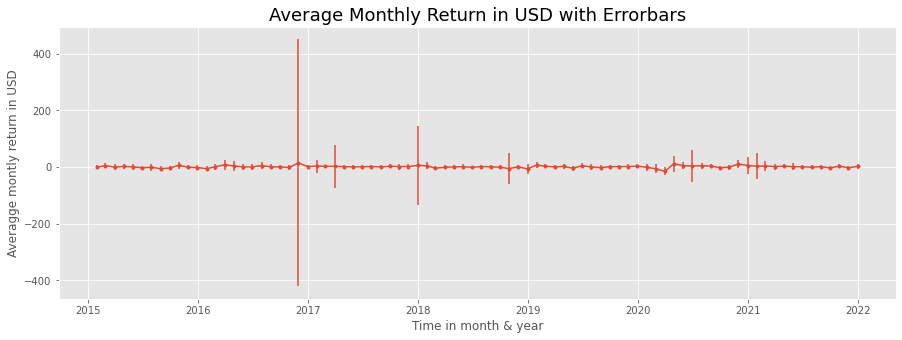

In [35]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,5))
ax.errorbar(monthlyreturn_ts.index, 
            monthlyreturn_ts[('monthly_return_USD', 'mean')],
            yerr=monthlyreturn_ts[('monthly_return_USD', 'std')],
            marker ='.'
           )
plt.xlabel('Time in month & year')
plt.ylabel('Averagge montly return in USD')
plt.title('Average Monthly Return in USD with Errorbars', fontsize=18)
fig.savefig('avg_monthly_ts.png')

### 4b. Understanding the Matplotlib Interface

1. `plt.subplots` create two objects commonly named `fig` and `ax`. 
    - The `fig` object is the container that holds everything on the plot.
    - The `ax` object is the part that holds the data that we want to plot. When used the quick way these objects are created by pandas by default. But we can specify them as well. 
    - Inside the `subplots` method we can specify an argument for `figsize` parameter that allows us to control the length and height of the plot.
    
    
2. The `ax` object can be used to access many methods to provide data to plot, titles, labels for axis, etc.
    - The `plot` method plots the data to the `fig` object. Additional plots can be added to the same figure by adding another line of `ax.plot` on another data. It also takes additional parameters that controls the style of plot. For example, `marker` and `linestyle` can be changed for a line plot to display two lines on the same figure differently. 
    - The `set_xlabel` and `set_ylabel` methods to display labels for each axis. 
    - The `set_title` method to give a title to the entire plot. 

In [36]:
equity_ts = etf_ts[etf_ts['Asset_Class']=='equity'].resample('M').mean()
realestate_ts = etf_ts[etf_ts['Asset_Class']=='real_estate'].resample('M').mean()

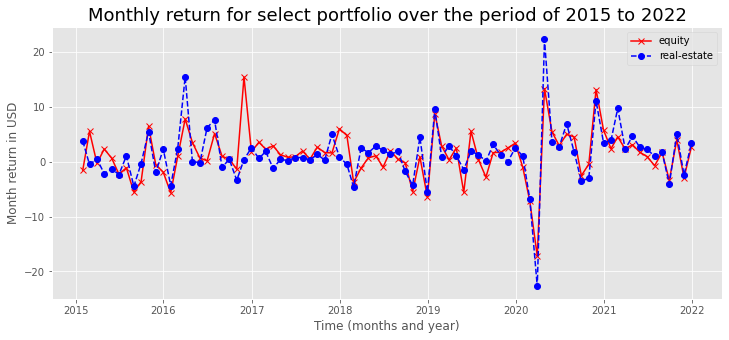

In [37]:
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(equity_ts['monthly_return_USD'], marker='x', color='r', label='equity')
ax.plot(realestate_ts['monthly_return_USD'], marker='o', linestyle='--', color='b', label='real-estate')

ax.set_xlabel('Time (months and year)')
ax.set_ylabel('Month return in USD')
ax.set_title('Monthly return for select portfolio over the period of 2015 to 2022', fontsize=18)

plt.legend()

plt.show()

The `subplots` method can also be used to create more than one plot on the same figure. The parameter `sharex` or `sharey` allows us to share the x and y axis respectively so that we do not have to repeat the same information on the plot. 

The `ax` object can then be indexed to extract the space for each plot and provide data to plot in these individual spaces. 

In [38]:
assetclass_ts = etf.pivot_table(index=['date'], 
                                columns=['Asset_Class'],
                                values=['monthly_return_USD', 'total_mkt_val_net_USD_millions'],
                               )
assetclass_ts.head()

monthly_return_USD                                  \
Asset_Class               bond commodity    equity real_estate   
date                                                             
2015-01-01                 NaN -0.640343 -1.530745    3.786328   
2015-02-01                 NaN  2.634139  5.548605   -0.491976   
2015-03-01                 NaN -5.323783 -0.303083    0.492793   
2015-04-01                 NaN  2.284367  2.332015   -2.159467   
2015-05-01                 NaN  5.638048  0.652395   -1.263921   

            total_mkt_val_net_USD_millions                            \
Asset_Class                           bond    commodity       equity   
date                                                                   
2015-01-01                             NaN  5231.286457  3172.109577   
2015-02-01                             NaN  7308.986790  3768.808837   
2015-03-01                             NaN  5238.508413  3436.124314   
2015-04-01                             NaN  4805.430307  3486.321720   
2015-05-01                             NaN  4704.650439  3452.561874   

                          
Asset_Class  real_estate  
date                      
2015-01-01   2920.478118  
2015-02-01   2657.529011  
2015-03-01   2360.004310  
2015-04-01   2117.946382  
2015-05-01   2077.472763

In [39]:
bond_ts = etf_ts[etf_ts['Asset_Class']=='bond'].resample('M').mean()
commodity_ts = etf_ts[etf_ts['Asset_Class']=='commodity'].resample('M').mean()


bond_ts = etf_ts[etf_ts['Asset_Class']=='bond'].resample('M').mean()
commodity_ts = etf_ts[etf_ts['Asset_Class']=='commodity'].resample('M').mean()

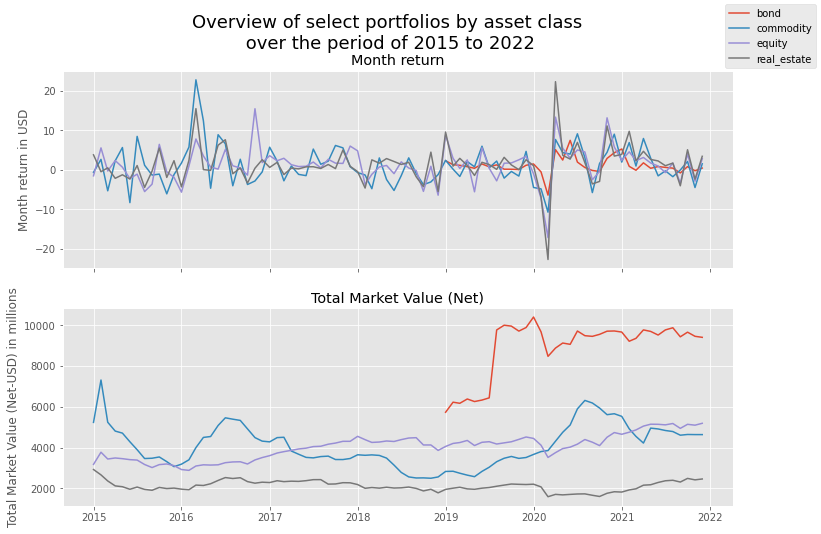

In [40]:
fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=True)

labels = [i for i in etf['Asset_Class'].unique()]
ax[0].plot(assetclass_ts[assetclass_ts.columns[:4]], label=labels) 
ax[1].plot(assetclass_ts[assetclass_ts.columns[4:]])

ax[0].set_ylabel('Month return in USD')
ax[1].set_ylabel('Total Market Value (Net-USD) in millions')

ax[0].set_title('Month return')
ax[1].set_title('Total Market Value (Net)')

plt.suptitle('Overview of select portfolios by asset class\n over the period of 2015 to 2022', fontsize=18)
plt.figlegend()

plt.show()

For more information on matplotlib, refer to this link : https://matplotlib.org/3.0.3/gallery/